<a href="https://colab.research.google.com/github/shovalkooba/shoval1/blob/master/cifar10%20with%20of%2080%25%20AUC%20and%20conf_matrix--%20final!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion matrix plot function

In [0]:
"""
================
Confusion matrix
================

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.

"""

#print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        normed_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        normed_cm = normed_cm*100;
        print("Normalized confusion matrix")
        print(normed_cm)
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20,20))
    plt.imshow(normed_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(normed_cm[i, j], fmt)+'%\n('+(format(cm[i, j], 'd'))+')',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.gcf().subplots_adjust(bottom=0.3)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Import Libraries

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential, Model
import keras.layers as layers
from keras.utils import to_categorical
from keras import optimizers
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from keras.layers import Conv2D,Flatten, Dense, Activation, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from numpy import argmax


Using TensorFlow backend.


Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Change labels to one-hot encoding\n",
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


Define Parameters

In [0]:
num_of_clss =   10          # number of classes

lr =      1e-4               # learning rate 
beta_1 =      0.9           # beta 1 - for adam optimizer
beta_2 = 0.99        # beta 2 - for adam optimizer
epsilon =    1e-8            # epsilon - for adam optimizer
epochs =    75           # number of epochs 
bs =       16        # batch size
dp=0.5

Network layes

In [5]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dp))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dp))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dp))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid',))
model.add(Dense(10, activation='softmax'))


Train the model

In [7]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/75





35000/35000 [==============================] - 179s 5ms/step - loss: 2.2732 - acc: 0.1360 - val_loss: 2.0740 - val_acc: 0.2245
Epoch 2/75
35000/35000 [==============================] - 182s 5ms/step - loss: 1.9788 - acc: 0.2559 - val_loss: 1.7866 - val_acc: 0.3383
Epoch 3/75
35000/35000 [==============================] - 181s 5ms/step - loss: 1.7246 - acc: 0.3600 - val_loss: 1.5972 - val_acc: 0.4135
Epoch 4/75
35000/35000 [==============================] - 183s 5ms/step - loss: 1.5420 - acc: 0.4322 - val_loss: 1.4964 - val_acc: 0.4559
Epoch 5/75
35000/35000 [==============================] - 181s 5ms/step - loss: 1.4216 - acc: 0.4822 - val_loss: 1.4781 - val_acc: 0.4731
Epoch 6/75
35000/35000 [=============

Plot Train and Validation loss

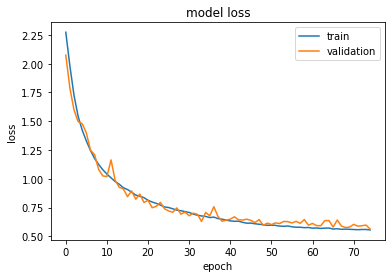

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show(); plt.close()


Model evaluation

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)
y_pred = model.predict(x_test)

10000/10000 [==============================] - 10s 1ms/step
test loss: 0.5822556520938873
test accuracy: 0.8031


Predict on test set

Normalized confusion matrix
[[87.9  2.1  3.1  0.5  0.6  0.2  0.4  0.6  2.   2.6]
 [ 2.2 91.5  0.   0.   0.1  0.1  0.6  0.   0.5  5. ]
 [19.4  0.2 64.4  1.2  4.1  4.6  4.6  1.2  0.1  0.2]
 [19.9  0.4  4.2 49.8  3.1 13.6  6.2  1.8  0.1  0.9]
 [12.7  0.1  2.4  2.5 72.   1.6  3.8  4.7  0.1  0.1]
 [13.6  0.4  2.   7.3  2.2 70.4  1.2  2.5  0.   0.4]
 [ 5.4  0.2  2.   1.6  0.5  0.9 88.9  0.1  0.3  0.1]
 [11.3  0.4  1.2  0.9  2.8  2.1  0.4 80.4  0.   0.5]
 [10.7  2.9  0.3  0.4  0.2  0.3  0.5  0.2 82.1  2.4]
 [ 4.   5.1  0.1  0.1  0.1  0.2  0.5  0.2  0.4 89.3]]
[[879  21  31   5   6   2   4   6  20  26]
 [ 22 915   0   0   1   1   6   0   5  50]
 [194   2 644  12  41  46  46  12   1   2]
 [199   4  42 498  31 136  62  18   1   9]
 [127   1  24  25 720  16  38  47   1   1]
 [136   4  20  73  22 704  12  25   0   4]
 [ 54   2  20  16   5   9 889   1   3   1]
 [113   4  12   9  28  21   4 804   0   5]
 [107  29   3   4   2   3   5   2 821  24]
 [ 40  51   1   1   1   2   5   2   4 893]]


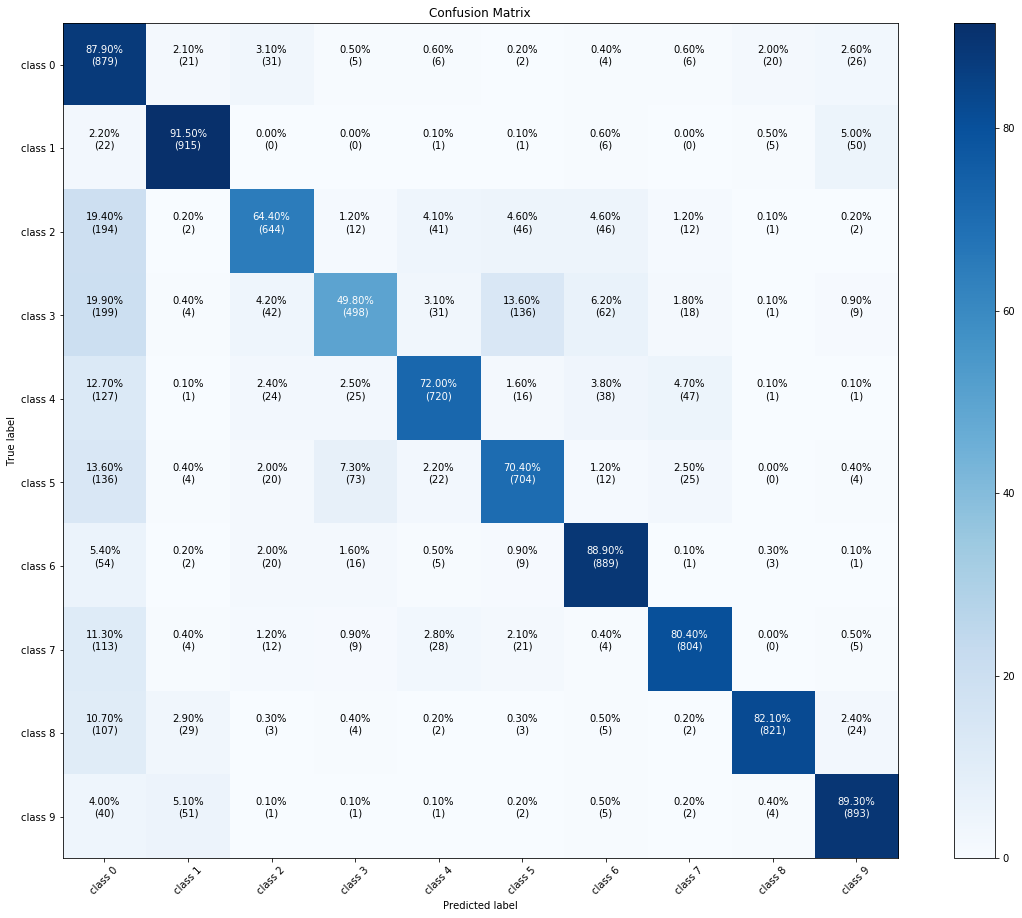

In [17]:
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title = 'Confusion Matrix',normalize=True)


Sunnerize

In [18]:
# Summerize the model arhiteture and parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

*binary* division for 0-else 

In [0]:
y_test_auc = [None] * len(y_test)
y_pred_auc = [None] * len(y_pred)

for i in range(0,len(y_test)):
  if(argmax(y_test[i])==0):
    y_test_auc[i]=0
  else:
   y_test_auc[i]=1


for i in range(0,len(y_pred)):
  if(argmax(y_pred[i])==0):
    y_pred_auc[i]=0
  else:
   y_pred_auc[i]=1


y_pred_auc= to_categorical(y_pred_auc)
y_test_auc= to_categorical(y_test_auc)



In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_auc[:, i], y_pred_auc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_auc.ravel(), y_pred_auc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

**plot** roc curve

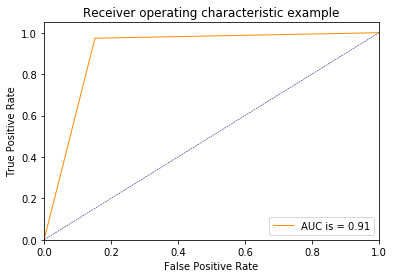

In [27]:
plt.figure()
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=1, label='AUC is = %0.2f' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plot confusion matrix for binary classification

Normalized confusion matrix
[[84.8        15.2       ]
 [ 2.65555556 97.34444444]]
[[ 848  152]
 [ 239 8761]]


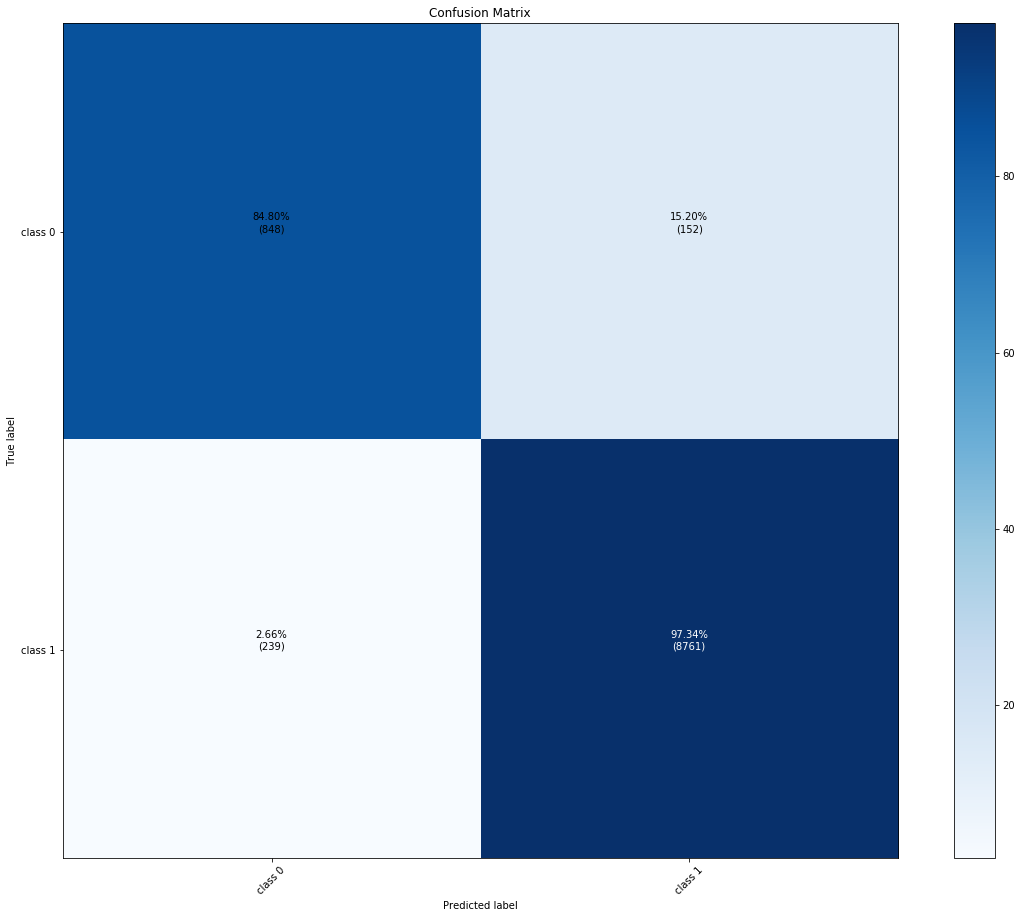

In [28]:
cm = confusion_matrix(np.argmax(y_test_auc,axis=1), np.argmax(np.round(y_pred_auc),axis=1))
labels = ['class ' + str(i) for i in range(2)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)